In [153]:
import os

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdate

from astropy.io import ascii

import datetime as dt

from hrcsentinel import hrccore as hrc


%config InlineBackend.figure_format = 'retina'

In [154]:
hrc.styleplots()
rasterized = True
markersize = 1.8
colortable = plt.rcParams['axes.prop_cycle'].by_key()['color']
red = colortable[0]
blue = colortable[1]
gggray = colortable[3]
yellow = colortable[4]
green = colortable[5]
pink = colortable[6]
purple = colortable[2]

In [155]:
dat = ascii.read('cycle5.buscurrent.dat', names=['Day', 'Hour', 'Minute', '+5 V Monitor', 'Bus Current Monitor', 'CEA Temp'])
dat

Day,Hour,Minute,+5 V Monitor,Bus Current Monitor,CEA Temp
int64,int64,int64,int64,int64,int64
188,23,59,191,151,128
188,23,59,191,151,128
188,23,59,191,151,128
188,23,59,191,151,128
188,23,59,191,151,128
188,23,59,191,151,128
188,23,59,191,151,128
188,23,59,191,151,128
188,23,59,191,151,128


In [156]:
def timecols_to_datetime(days, hours, minutes):
    '''Take day, hour, minute columns and return as an array of datetime objects'''
    times = []
    epoch = dt.datetime(1997, 1, 1, 0, 0)
    for i, day in enumerate(days):
        daydelta = epoch + dt.timedelta(days=int(day))
        correct_time = daydelta + dt.timedelta(hours=int(hours[i]), minutes=int(minutes[i]))
        times.append(correct_time)
        
    return times

In [157]:
def convert_cea_temp(cea_dn):
    
    # for CEA 2CHTRPZT, from the ARG
    a = 0.00133543
    b = 0.00025266
    c = 2.2001e-07
    
    K = cea_dn
    L = (5100 * K) / 255
    R = 1/((1/L)-(1/4500))
    T = (1 / (a+b * np.log(R) + c*(np.log(R))**3)) - 273.16
    return T

In [158]:
def convert_5v_monitor(plus5mon_dn):
    DN = plus5mon_dn
    m = 0.0390625
    b = 0
    V = m * DN + b
    
    return V

In [170]:
def convert_buscurrent(current_dn):
    DN = current_dn
    m = 0.0682
    b = -8.65
    I = m * DN + b
    
    return I

In [160]:
times = timecols_to_datetime(dat['Day'], dat['Hour'], dat['Minute'])
plus5mon = dat['+5 V Monitor']
buscurrent = dat['Bus Current Monitor']
CEAtemp = dat['CEA Temp']

/Applications/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Applications/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Applications/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Applications/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later


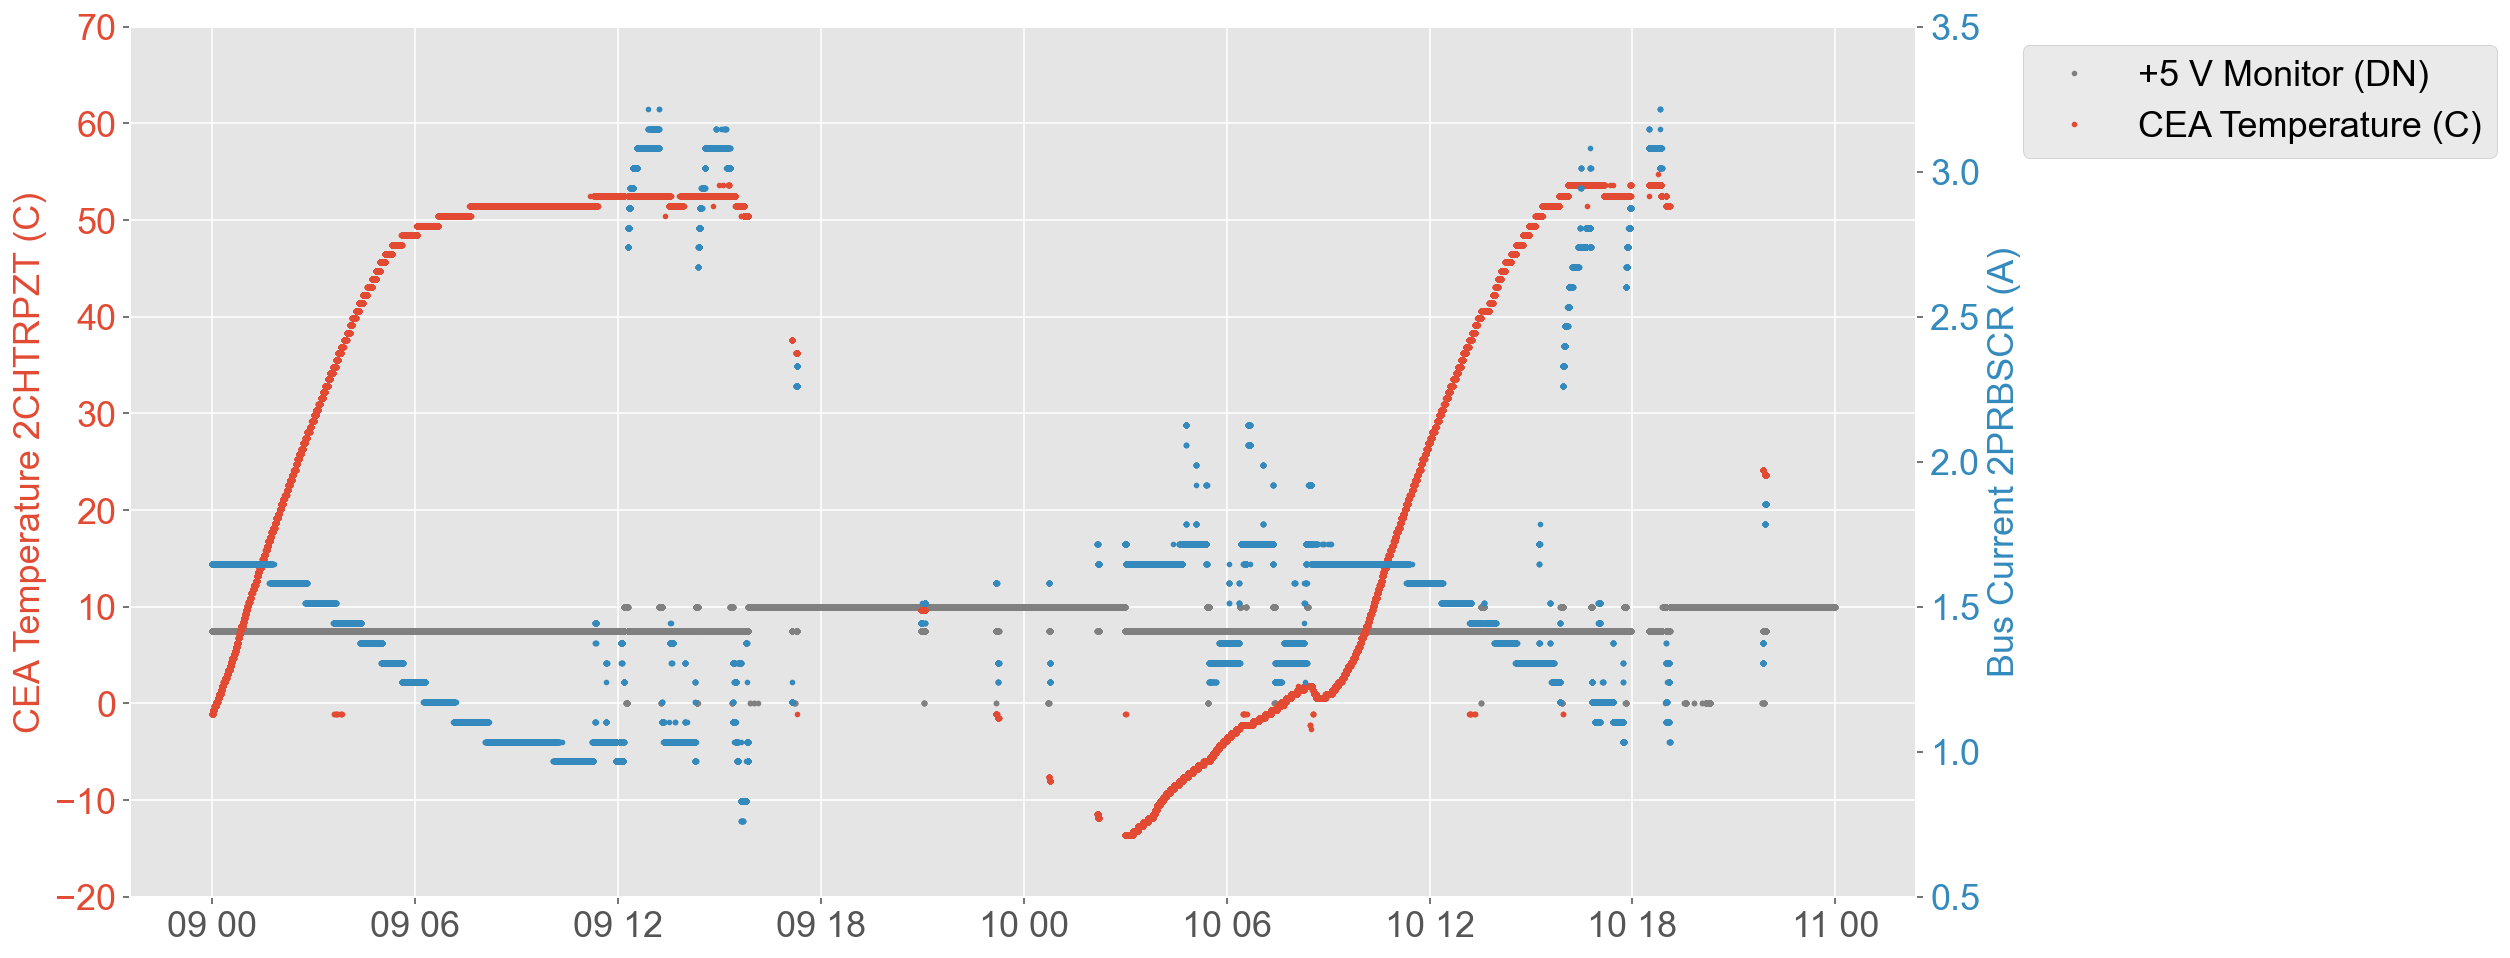

In [184]:
markersize=1.8
fig, ax0 = plt.subplots(figsize=(16,8))

ax0.plot_date(times, convert_5v_monitor(plus5mon), markersize=markersize, label='+5 V Monitor (DN)', color='gray', rasterized=True)
ax0.plot_date(times, convert_cea_temp(CEAtemp), markersize=markersize, label='CEA Temperature (C)',  rasterized=True)

ax0.grid('off', axis='y')


buscurrent_mask = np.logical_and(buscurrent < 175, buscurrent > 135)

ax1 = plt.twinx(ax0)
ax1.plot_date(np.array(times)[buscurrent_mask], convert_buscurrent(buscurrent[buscurrent_mask]), markersize=markersize, label='(Bus Current Monitor (DN))', rasterized=True, color=blue)

ax0.grid('off')

# ax0.set_ylim(10, 160)
ax0.set_ylim(-20, 70)
ax1.set_ylim(0.5, 3.5)

ax1.grid('off', axis='y')

# # ADD THIS LINE
# ax1.set_yticks(np.linspace(ax1.get_yticks()[0], ax1.get_yticks()[-1], len(ax0.get_yticks())))

ax1.grid(False)
# ax0.grid(False)
ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left',)



ax0.set_ylabel('CEA Temperature 2CHTRPZT (C)', color=red)
ax0.tick_params(axis='y', labelcolor=red)

ax1.set_ylabel('Bus Current 2PRBSCR (A)', color=blue)
ax1.tick_params(axis='y', labelcolor=blue)

date_format = mdate.DateFormatter('%d %H')
plt.gca().xaxis.set_major_formatter(date_format)

fig.savefig('../../Figures/GroundData.pdf', dpi=300, bbox_inches='tight', rasterized=True)

In [182]:
times

[datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 8, 23, 59),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(199

In [133]:
buscurrent_mask

array([False, False, False, ...,  True,  True,  True])